In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans

In [ ]:
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<hr>

**A.  CARGAR DATA Y LIBRERIAS A UTILIZAR**


In [ ]:
df = pd.read_csv('/content/loans.csv')

<hr>

**B. EXPLORACIÓN**

In [ ]:
print(f'Hay {df.shape[1]:,} columnas en el dataframe.')
print(f'Hay {df.shape[0]:,} filas en el dataframe.')

Hay 11 columnas en el dataframe.
Hay 6,019 filas en el dataframe.


In [ ]:
df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
funded_date,937
description,342
use,342
location_country_code,17
id_number,0
loan_amount,0
lender_count,0
status,0
funded_amount,0
repayment_term,0


<hr>

**C. APLICACIÓN DE KMEANS**

In [ ]:
df = df[['funded_amount', 'repayment_term']]

In [ ]:
fig = px.histogram(df, x='funded_amount')
fig.show()

[Text(0.5, 0, 'Monto financiero'),
 Text(0, 0.5, 'Cantidad'),
 Text(0.5, 1.0, 'Histograma de monto financiado')]

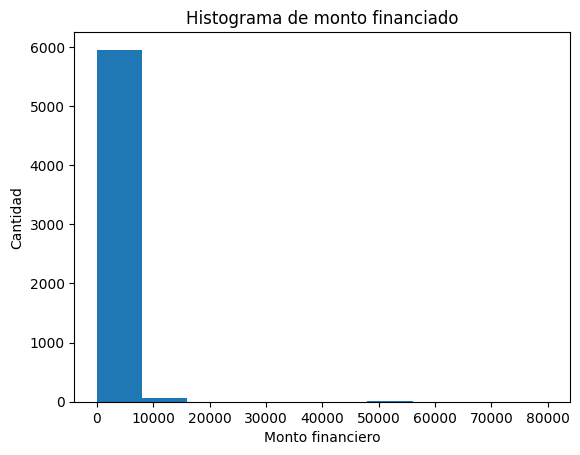

In [ ]:
ax = df.funded_amount.hist(grid=False)
ax.set(xlabel='Monto financiero', ylabel='Cantidad', title='Histograma de monto financiado')

In [ ]:
fig = px.histogram(df, x='repayment_term')
fig.show()

[Text(0.5, 0, 'Plazo de amortizacion'),
 Text(0, 0.5, 'Cantidad'),
 Text(0.5, 1.0, 'Histograma del plazo de amortizacion')]

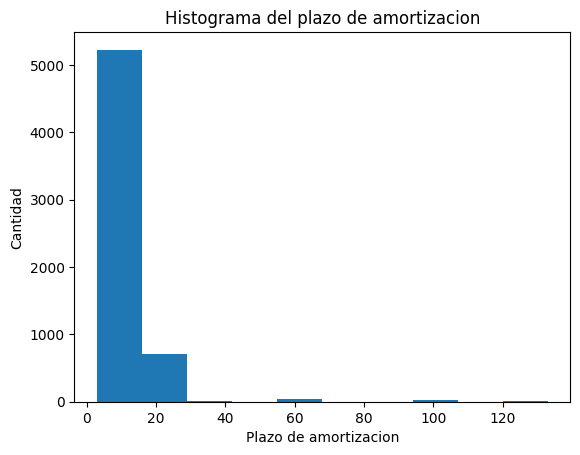

In [ ]:
ax = df.repayment_term.hist(grid=False)
ax.set(xlabel='Plazo de amortizacion', ylabel='Cantidad', title='Histograma del plazo de amortizacion')

In [ ]:
funded_small = df.funded_amount < 2500
repayment_short = df.repayment_term < 60
df = df[funded_small & repayment_short]

In [ ]:
fig = px.histogram(df, x='funded_amount')
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [ ]:
df['kmeans_labels'] = kmeans.labels_

In [ ]:
df.head(10)

,funded_amount,repayment_term,kmeans_labels
1,975,12,2
2,950,14,2
3,825,14,2
4,725,13,2
5,725,13,2
6,725,13,2
7,525,13,0
8,950,14,2
9,500,10,0
10,200,11,0


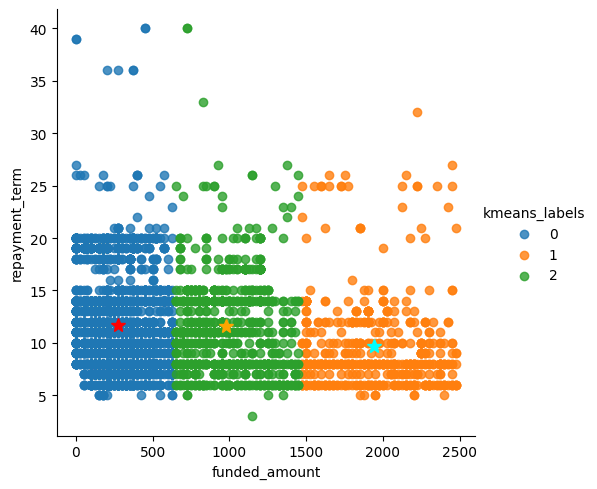

In [ ]:
kmeans_plot = sns.lmplot(x='funded_amount', y='repayment_term', data=df, hue='kmeans_labels', fit_reg=False, legend=True)
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], '*', markersize=10, color='red')
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], '*', markersize=10, color='cyan')
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], '*', markersize=10, color='orange')

**¿Es posible tener demasiados grupos? ¿O muy pocos grupos?**

Tener un exceso de grupos puede provocar un sobreajuste y dificultar la interpretación de los resultados, mientras que un número reducido de grupos puede conducir a la pérdida de información relevante y a una falta de distinción entre los prestatarios, complicando de esta manera el análisis y la toma de decisiones.